In [99]:
# (1) 데이터 가져오기

import pandas as pd
# train.csv 데이터를 train 변수로 가져오기
train = pd.read_csv('/kaggle/input/test-bike-sharing/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [91]:
print(train.shape)
print(train.info())

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [92]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


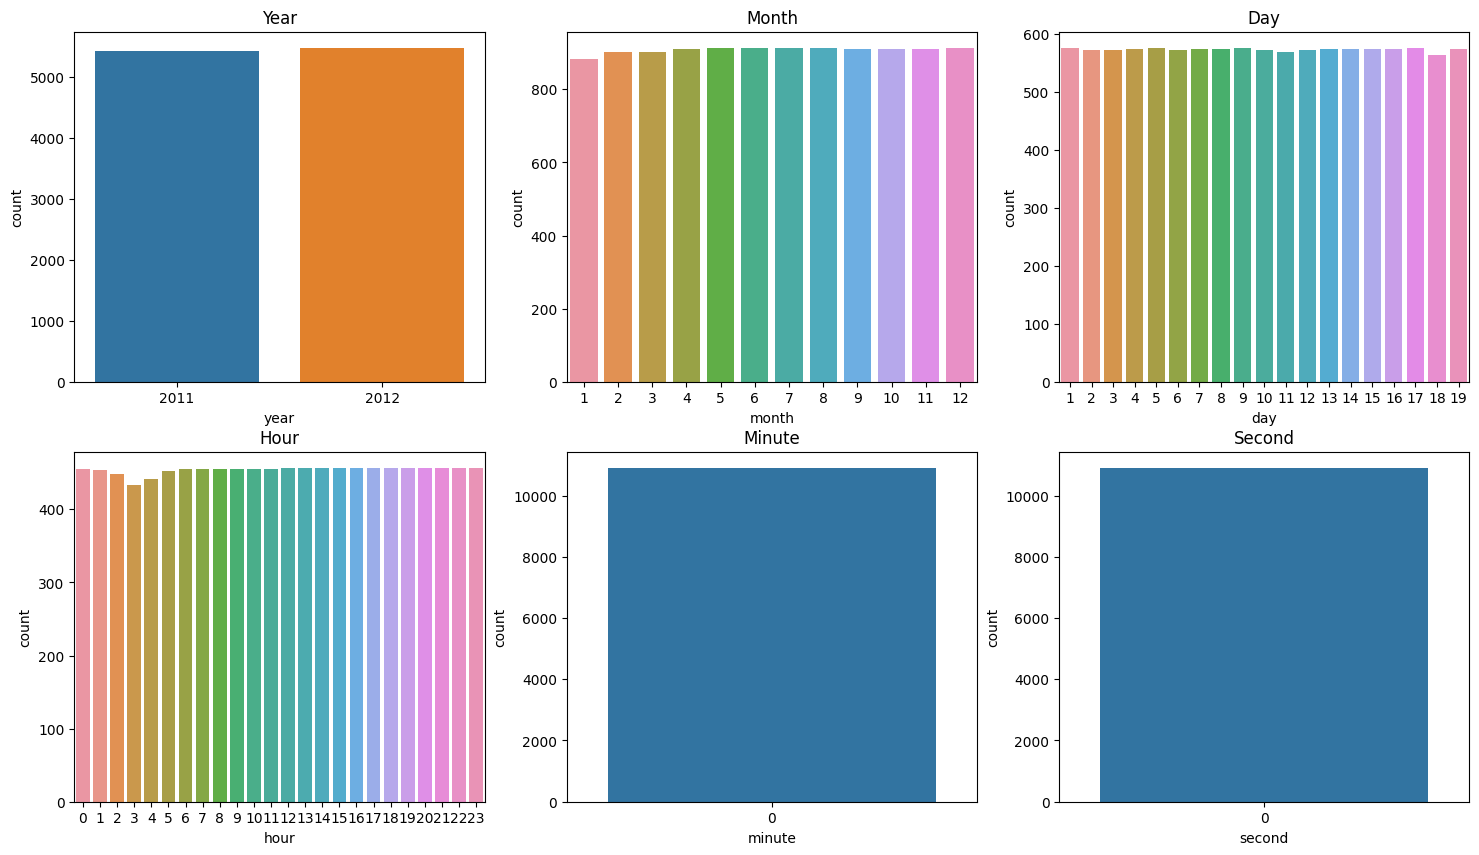

In [93]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(data=train, x='year', ax=axes[0, 0])
axes[0, 0].set_title('Year')
sns.countplot(data=train, x='month', ax=axes[0, 1])
axes[0, 1].set_title('Month')
sns.countplot(data=train, x='day', ax=axes[0, 2])
axes[0, 2].set_title('Day')
sns.countplot(data=train, x='hour', ax=axes[1, 0])
axes[1, 0].set_title('Hour')
sns.countplot(data=train, x='minute', ax=axes[1, 1])
axes[1, 1].set_title('Minute')
sns.countplot(data=train, x='second', ax=axes[1, 2])
axes[1, 2].set_title('Second')

plt.show()

In [94]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리

# 모델에 못 들어가는 컬럼이나 필요없는거 삭제
drop_cols = ['casual', 'registered', 'count', 'datetime', 'minute', 'second']
X = train.drop(columns=drop_cols)
y = train['count']

# 결측값 확인 후 채우기
print(X.isna().sum())
X = X.fillna(X.mean())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
dtype: int64


((8164, 12), (2722, 12), (8164,), (2722,))

In [95]:
# (5) LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

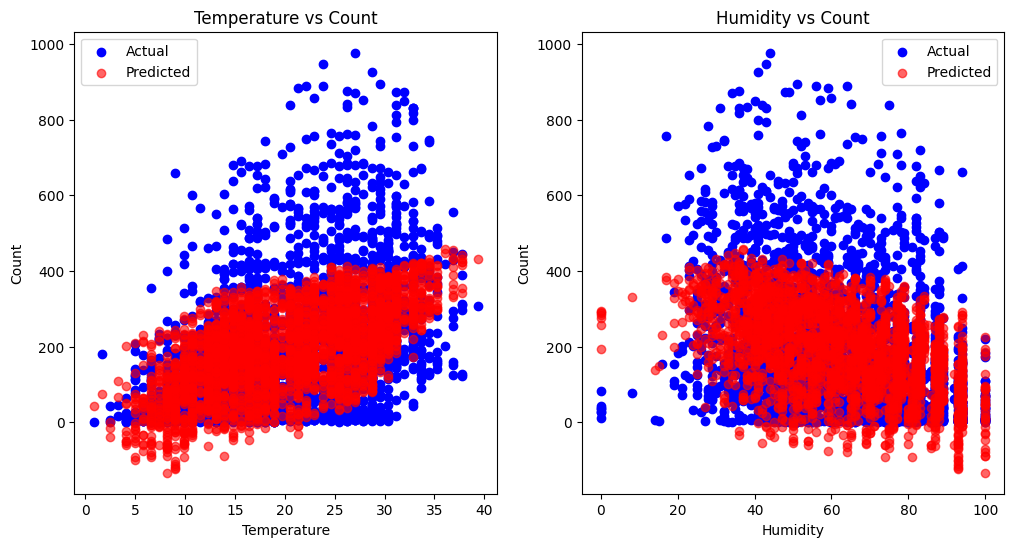

In [97]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual')
plt.scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual')
plt.scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.legend()

plt.show()